# Ford_Gobike_Systems
## by Subaru Goto

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This service has started since June 2017. Therefore, there is data from June 2017 to December 2018. The data set can be downloaded from https://www.fordgobike.com/system-data .

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import folium

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# open several zip files
# http://cracktechinterviews.com/Article.aspx?BlogID=21&Title=How-to-import-multiple-files-into-Pandas-data-frame-efficiently?
# get all the zip files
zip_files = glob.glob('2018*-fordgobike-tripdata.csv.zip')
# initialize the list for data frame
file_lists = []

for file in zip_files:
    
    data = pd.read_csv(file, header = 0, sep = ",")
    file_lists.append(data)

# merge
df_2018 = pd.concat(file_lists, ignore_index = True)

In [3]:
# check df
df_2018.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1863716,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No
1863717,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No
1863718,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No
1863719,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.0,Male,No
1863720,150,2018-12-01 00:03:05.7420,2018-12-01 00:05:36.0260,107.0,17th St at Dolores St,37.763015,-122.426497,119.0,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,NaN,NaN,No


In [4]:
# check info
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [5]:
# check na
df_2018.isna().sum() / df_2018.shape[0]

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.006316
start_station_name         0.006316
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.006316
end_station_name           0.006316
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          0.059407
member_gender              0.059219
bike_share_for_all_trip    0.000000
dtype: float64

In [6]:
# check summary statistics
df_2018.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


In [7]:
# load 2017 data into data frames
df_2017 = pd.read_csv("2017-fordgobike-tripdata.csv")

In [8]:
# check head
df_2017.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [9]:
# check na
df_2017.isna().sum() / df_2017.shape[0]

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.000000
start_station_name         0.000000
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.000000
end_station_name           0.000000
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          0.128037
member_gender              0.127885
dtype: float64

In [10]:
# check shape
print(df_2018.shape)
print(df_2017.shape)

(1863721, 16)
(519700, 15)


In [11]:
# check columns name
df_2018.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [12]:
# # check columns name
df_2017.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender'],
      dtype='object')

## What is the structure of your dataset?

> Adding both data sets, there are 2383421 observations in total. A number of columns is 16 for the 2018 data set and 15 for the 2017 data set. Before we start analyzing data, data cleaning is essential.
Following points should be checked in the data set.
<p></p>

>This is important to note that as there is no user id information. Therefore, many observations can stem from the same users.

### Quality issue

- missing value for start and end station id as well as name
- missing gender
- missing birth of year
- start and end time is string
- station id is float
- bike id is int
- gender is string
- bike share service is string
- bike share service column is missing in the 2017 data set
- user type is string
- duration in second is difficult to handle with
- member_birth_year is difficult to handle with

### Structure issue

- merge 2 data set together
- start time and end time contains dates and times

## Clean
### Defition
Concatinate the 2 data sets and create one data frame. As bike_sare_for_all_trip seems like a new service from 2018, I will create a new column for the 2017 data set with No.

## columns
Trip Duration (seconds)

Start Time and Date

End Time and Date

Start Station ID

Start Station Name

Start Station Latitude

Start Station Longitude

End Station ID

End Station Name

End Station Latitude

End Station Longitude

Bike ID

User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

Member Year of Birth

Member Gender

bike sare for all trip

#### Reference https://www.fordgobike.com/system-data

In [13]:
# create a new column and fill in with "No"
df_2017["bike_share_for_all_trip"] = "No"

In [14]:
# check data set size
print(df_2017.size)
print(df_2018.size)
print(df_2017.size + df_2018.size)

8315200
29819536
38134736


In [15]:
# concat
df_all = pd.concat([df_2017, df_2018], ignore_index = True)

## Test

In [16]:
# check size
df_all.size

38134736

In [17]:
# check df
df_all.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1534250,852,2018-07-02 07:53:29.8010,2018-07-02 08:07:41.8710,243.0,Bancroft Way at College Ave,37.869360,-122.254337,265.0,Ninth St at Parker St,37.858868,-122.291209,1000,Subscriber,1995.0,Male,No
800115,473,2018-03-10 09:11:01.8160,2018-03-10 09:18:55.3780,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,181.0,Grand Ave at Webster St,37.811377,-122.265192,2581,Subscriber,1984.0,Female,No
1542558,786,2018-08-31 09:23:20.3340,2018-08-31 09:36:26.4320,116.0,Mississippi St at 17th St,37.764802,-122.394771,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4439,Subscriber,1994.0,Male,No
2096708,466,2018-10-03 18:58:43.6410,2018-10-03 19:06:30.4010,160.0,West Oakland BART Station,37.805318,-122.294837,231.0,14th St at Filbert St,37.808750,-122.283282,2092,Subscriber,1982.0,Female,No
955333,1074,2018-04-03 08:33:49.9090,2018-04-03 08:51:44.4810,56.0,Koshland Park,37.773414,-122.427317,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2730,Subscriber,1987.0,Male,No


In [18]:
# check info
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 290.9+ MB


In [19]:
# check duplication
df_all.duplicated().sum()

0

In [20]:
# check na
df_all.isna().sum() / df_all.shape[0]

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.004939
start_station_name         0.004939
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.004939
end_station_name           0.004939
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          0.074372
member_gender              0.074191
bike_share_for_all_trip    0.000000
dtype: float64

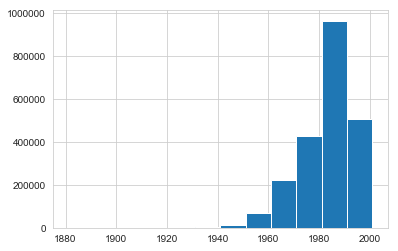

In [21]:
# check hist for any outliers or possible error
bins_edge = np.arange(df_all.member_birth_year.min(), df_all.member_birth_year.max() + 10, 10)
plt.hist(data = df_all, x = "member_birth_year", bins = bins_edge);

> It seems like some observations are over 100 years old, which is questionalble.

In [22]:
# check youngest
df_all.member_birth_year.sort_values(ascending = False).head()

2062405    2000.0
2302496    2000.0
1577120    2000.0
2298833    2000.0
1791982    2000.0
Name: member_birth_year, dtype: float64

In [23]:
# check oldest
df_all.member_birth_year.sort_values(ascending = True).head()

1402838    1881.0
1400283    1881.0
1402687    1881.0
1402215    1881.0
1402346    1881.0
Name: member_birth_year, dtype: float64

## Clean

### Definition
Missing value for station id/ name, birth of year and gender.

In [24]:
# check missing values
df_all[df_all.isnull().any(axis = 1)].sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1794395,1008,2018-09-20 17:20:27.9020,2018-09-20 17:37:16.2250,90.0,Townsend St at 7th St,37.771058,-122.402717,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3007,Customer,NaN,NaN,No
800465,287,2018-03-09 22:03:24.9660,2018-03-09 22:08:12.1250,163.0,Lake Merritt BART Station,37.797320,-122.265320,233.0,12th St at 4th Ave,37.795812,-122.255555,1579,Subscriber,NaN,NaN,No
993374,8915,2018-05-26 14:11:18.5850,2018-05-26 16:39:54.5780,70.0,Central Ave at Fell St,37.773311,-122.444293,70.0,Central Ave at Fell St,37.773311,-122.444293,3897,Customer,NaN,NaN,No
2247182,1728,2018-11-01 16:52:32.7980,2018-11-01 17:21:21.0610,368.0,Myrtle St at Polk St,37.785434,-122.419622,72.0,Page St at Scott St,37.772406,-122.435650,2174,Customer,NaN,NaN,No
2073646,1425,2018-10-07 16:12:02.9050,2018-10-07 16:35:48.6220,70.0,Central Ave at Fell St,37.773311,-122.444293,105.0,16th St at Prosper St,37.764285,-122.431804,193,Customer,NaN,NaN,No
685331,543,2018-02-09 09:38:35.1650,2018-02-09 09:47:39.1590,114.0,Rhode Island St at 17th St,37.764478,-122.402570,77.0,11th St at Natoma St,37.773507,-122.416040,3088,Subscriber,NaN,NaN,No
567845,5924,2018-01-17 21:18:08.2940,2018-01-17 22:56:53.0100,76.0,McCoppin St at Valencia St,37.771662,-122.422423,72.0,Page St at Scott St,37.772406,-122.435650,2007,Customer,NaN,NaN,No
516122,959,2017-07-02 17:17:49.8380,2017-07-02 17:33:49.6940,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,54,Customer,NaN,NaN,No
117757,1539,2017-11-20 09:39:01.4210,2017-11-20 10:04:40.5180,126.0,Esprit Park,37.761634,-122.390648,19.0,Post St at Kearny St,37.788975,-122.403452,2224,Customer,NaN,NaN,No
2328835,1083,2018-12-12 17:01:38.7300,2018-12-12 17:19:42.2840,157.0,65th St at Hollis St,37.846784,-122.291376,241.0,Ashby BART Station,37.852477,-122.270213,2033,Customer,NaN,NaN,No


In [25]:
# check summary statistic
df_all.member_birth_year.describe()

count    2.206162e+06
mean     1.982537e+03
std      1.051346e+01
min      1.881000e+03
25%      1.977000e+03
50%      1.985000e+03
75%      1.990000e+03
max      2.000000e+03
Name: member_birth_year, dtype: float64

In [26]:
# check na
df_all.isna().sum() / df_all.shape[0]

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.004939
start_station_name         0.004939
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.004939
end_station_name           0.004939
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          0.074372
member_gender              0.074191
bike_share_for_all_trip    0.000000
dtype: float64

>  7 % of age information are missing. As it is difficult to get the information, I will leave the missing value for now. A station name may be able to identify with the given latitude and longitude.

In [27]:
# find most common combination
df_all[df_all.start_station_id.isnull()].groupby(["start_station_latitude", "start_station_longitude"]).size().sort_values(ascending = False).head(10)

start_station_latitude  start_station_longitude
37.41                   -121.94                    2104
37.40                   -121.94                    1588
                        -121.93                    1427
37.41                   -121.96                    1240
37.40                   -121.92                    1162
37.41                   -121.95                     961
37.42                   -121.96                     668
37.39                   -121.93                     584
37.41                   -121.93                     470
37.42                   -121.95                     335
dtype: int64

https://www.latlong.net/Show-Latitude-Longitude.html & https://member.fordgobike.com/map/
37.41 -121.94 = Baypointe Parkway, San Jose, California 95134, United States of America
37.40 -121.94 = 3331 N 1st St, San Jose, California 95134, United States
37.40 -121.93 = Central San Jose, San Jose, California 95125, United States of America
37.41 -121.96 = not found
37.40 -121.92 = Epic, 600 Epic Way, San Jose, California 95134, United States of America
37.42 -121.96 = not found
37.39 -121.93 = 2704 North 1st Street, San Jose, California 95134, United States of America
37.41 -121.93 = not found
37.42 -121.95 = not found
37.38 -121.93 = 2509 Orchard Parkway, San Jose, California 95131, United States of America

> There is a tendency that a missing station name is data from the next city San Jose.

### Clean

### Definition

Extract start/end year, month, day and time from the start / end time columns

In [28]:
# convert data type
df_all["start_time"] = pd.to_datetime(df_all.start_time)
df_all["end_time"] = pd.to_datetime(df_all.end_time)

In [29]:
# create new columns
df_all["start_date"] = df_all.start_time.dt.date
df_all["start_hour"] = df_all.start_time.dt.hour
df_all["start_min"] = df_all.start_time.dt.minute

df_all["end_date"] = df_all.end_time.dt.date
df_all["end_hour"] = df_all.end_time.dt.hour
df_all["end_min"] = df_all.end_time.dt.minute

In [30]:
# create date columns
df_all["start_date"] = pd.to_datetime(df_all.start_date)
df_all["end_date"] = pd.to_datetime(df_all.end_date)

In [31]:
# create a weekday column and convert it to string
df_all["start_weekday"] = df_all.start_date.dt.dayofweek
df_all["start_weekday"] = df_all["start_weekday"].replace({0:"Mon",
                                                          1:"Tue",
                                                          2:"Wed",
                                                          3:"Thu",
                                                          4:"Fri",
                                                          5:"Sat",
                                                          6:"Sun"})

In [32]:
# drop start time and end time
df_all.drop(columns = ["start_time", "end_time"], axis = 1, inplace = True)

### Test

In [33]:
# check
df_all.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hour,start_min,end_date,end_hour,end_min,start_weekday
0,80110,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,...,1987.0,Male,No,2017-12-31,16,57,2018-01-01,15,12,Sun
1,78800,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,...,1965.0,Female,No,2017-12-31,15,56,2018-01-01,13,49,Sun
2,45768,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,...,NaN,NaN,No,2017-12-31,22,45,2018-01-01,11,28,Sun
3,62172,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,...,NaN,NaN,No,2017-12-31,17,31,2018-01-01,10,47,Sun
4,43603,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,...,1997.0,Female,No,2017-12-31,14,23,2018-01-01,2,29,Sun


## Clean
### Definition

Create a new column for usage duration in minutes. Then delete the duration_sec column.

In [34]:
# create min usage column
df_all["duration_min"] = df_all["duration_sec"] / 60

In [35]:
# drop min
df_all.drop("duration_sec", axis = 1, inplace = True)

## Test

In [36]:
# check
df_all.columns

Index(['start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_date', 'start_hour', 'start_min', 'end_date', 'end_hour',
       'end_min', 'start_weekday', 'duration_min'],
      dtype='object')

## Clean
### Definition

Create a new column for an age. 2018 - date of birth

In [37]:
# create a age column # data is from June 2017 to December 2018
df_all["age"] = 2018 - df_all.member_birth_year
df_all.drop("member_birth_year", axis = 1, inplace = True)

## Test

In [38]:
# check
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 21 columns):
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_gender              object
bike_share_for_all_trip    object
start_date                 datetime64[ns]
start_hour                 int64
start_min                  int64
end_date                   datetime64[ns]
end_hour                   int64
end_min                    int64
start_weekday              object
duration_min               float64
age                        float64
dtypes: datetime64[ns](2), float64(8), int64(5), object(6)
memory usage: 381.9+ MB


> Accordning to the Ford Gobike service agreement, the user must be older than 18 years old.

## Clean

### Definition 
several columns have wrong data types. Convert them.

In [39]:
# convert data types
df_all["start_station_id"] = df_all["start_station_id"].astype("str")
df_all["end_station_id"] = df_all["end_station_id"].astype("str")
df_all["bike_id"] = df_all["bike_id"].astype("str")
df_all["member_gender"] = df_all["member_gender"].astype("category")
df_all["bike_share_for_all_trip"] = df_all["bike_share_for_all_trip"].astype("category")
df_all["start_weekday"] = df_all["start_weekday"].astype("category")

## Test

In [40]:
# check
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 21 columns):
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_gender              category
bike_share_for_all_trip    category
start_date                 datetime64[ns]
start_hour                 int64
start_min                  int64
end_date                   datetime64[ns]
end_hour                   int64
end_min                    int64
start_weekday              category
duration_min               float64
age                        float64
dtypes: category(3), datetime64[ns](2), float64(6), int64(4), object(6)
memory usage: 334.1+ MB


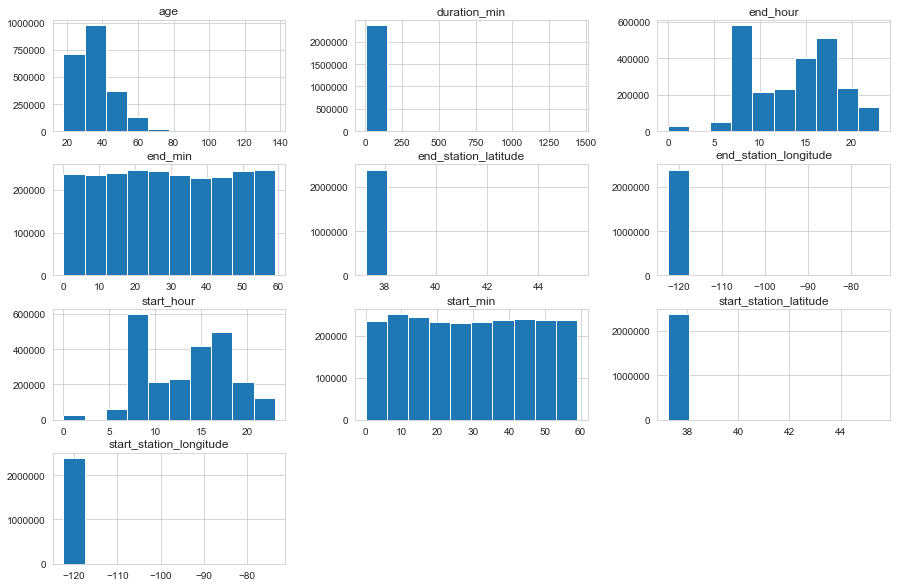

In [41]:
# check qucik histogram
df_all.hist(figsize=[15, 10]);

> Outlier of Latitude and Longitude are the data with a missing station name. The data is from the next city.<p></p>
> Age and start hour can be interesting to look at.

### What is/are the main feature(s) of interest in your dataset?

- What kind of people are using this service?
- How long do people use this service per trip?
- when do people use this service?
- What kind of changes can be seen over time?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- Gender, age, bike_share_for_all_trip, user type, start_hour, weekday, month, date 
> With these variables I should be able to find some insights.

## Univariate Exploration

> Are there any differences in the srvice usage among different genders?

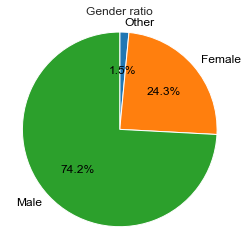

In [122]:
# plot gender
gender = df_all.groupby("member_gender").size()
sorted_counts = gender.sort_values()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct = '%1.1f%%',
       textprops=dict(color = "black", size = 12))
plt.axis("square")
plt.title("Gender ratio");

> More than 70% of user are male. what about a user type?

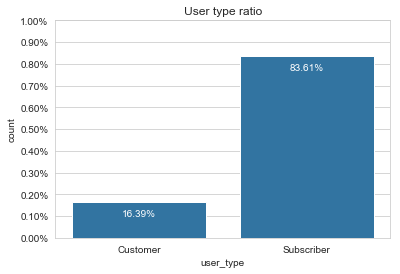

In [43]:
# check customer type
# get base blue color
base_color = sns.color_palette()[0]
sns.countplot(data = df_all, x = "user_type", color = base_color)

# create % annot

n_point = df_all.shape[0]
cat_counts = df_all["user_type"].value_counts()
# get the current x location and label
locs, labels = plt.xticks()

# loop through each pair of location and label
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100 * count / n_point)
    plt.text(loc, count-150000, pct_string, ha = 'center', color = 'w')

# get % in y axis
max_counts = df_all["user_type"].value_counts().max()
max_prop = max_counts / n_point
tick_props = np.arange(0, max_prop + 0.2, 0.1)
tick_names = ['{:0.2f}%'.format(v) for v in tick_props]
plt.yticks(tick_props * n_point, tick_names)

plt.title("User type ratio");

> More than 80% of people are  subscriber. Now I will check how many % of people use the Bike share for all trip service.

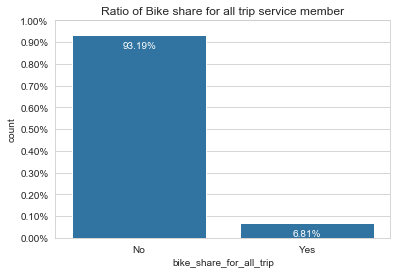

In [44]:
# bike share service

base_palette = sns.color_palette()[0]
sns.countplot(data = df_all, x = "bike_share_for_all_trip", color = base_color)

# get % y axis

n_point = df_all.shape[0]
max_count = df_all["bike_share_for_all_trip"].value_counts().max()
max_prop = max_count / n_point

tick_props = np.arange(0, max_prop + 0.1, 0.1)
tcik_names = ['{:0.2f}%'.format(v) for v in tick_props]
plt.yticks(tick_props * n_point, tick_names)

# get x %
cat_counts = df_all["bike_share_for_all_trip"].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100 * count / n_point)
    plt.text(loc, count - 140000, pct_string, ha = "center", color = "w")

plt.title("Ratio of Bike share for all trip service member");


> More than 90% of user is not part of the bike_share_for_all_trip service. This makes sense as the service is only for people qualify for certain requirements. https://www.fordgobike.com/pricing/bikeshareforall <p></p>

In [45]:
# age summary statistic
df_all.age.describe()

count    2.206162e+06
mean     3.546318e+01
std      1.051346e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.100000e+01
max      1.370000e+02
Name: age, dtype: float64

> It makes sense that a start age is 18, as the Ford GoBike terms and condition insists that user has to be at least 18. However, people with 137 years old are questionable. Now I am going to check a distribution of age.
<p></p>
How old are the user of this service?

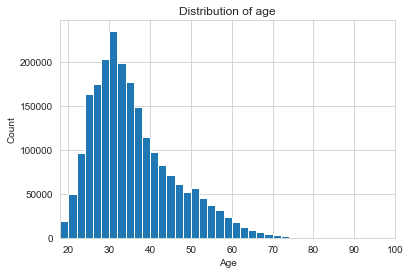

In [46]:
# plot hist
bin_edges = np.arange(18, df_all.age.max() +2, 2)

# set lims between 18 years old and 100
plt.xlim(18, 100)
plt.hist(data = df_all, x = "age", bins = bin_edges)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of age");

> A peak is around at 30 years old and the distribution is skewed. I will check how long people use a bike per trip.

> How long do they use a bike per trip?

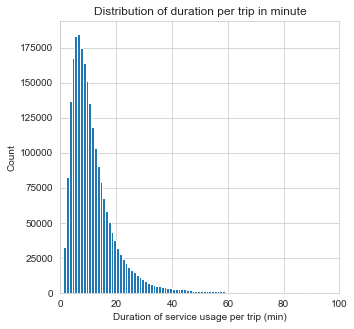

In [47]:
# hist service usage time per trip
plt.figure(figsize=[5, 5])

# 1 min bins
bin_edges = np.arange(0, df_all["duration_min"].max() + 1, 1)
# focus on data below 100 min
plt.xlim(0, 100)
plt.hist(data = df_all, x = "duration_min", bins = bin_edges)
plt.xlabel("Duration of service usage per trip (min)")
plt.ylabel("Count")
plt.title("Distribution of duration per trip in minute");

> As the data is skewed, I will transform the duration_min with log transformation.

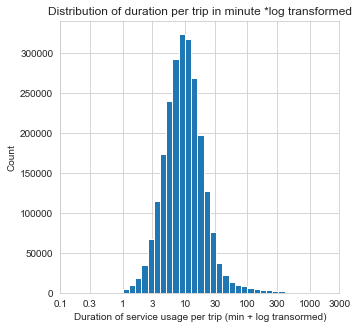

In [48]:
# hist service usage time per trip in log transformation
plt.figure(figsize=[5, 5])

# 1 min bins
bin_edges = 10 ** np.arange(0, np.log10(df_all["duration_min"].max()) + 0.1, 0.1)
# focus on data below 100 min
plt.xscale("log")
plt.hist(data = df_all, x = "duration_min", bins = bin_edges)

tick_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)

plt.xlabel("Duration of service usage per trip (min + log transormed)")
plt.ylabel("Count")
plt.title("Distribution of duration per trip in minute *log transformed");

In [49]:
# check summary statistic
df_all["duration_min"].describe()

count    2.383421e+06
mean     1.516677e+01
std      4.406442e+01
min      1.016667e+00
25%      5.950000e+00
50%      9.400000e+00
75%      1.475000e+01
max      1.439483e+03
Name: duration_min, dtype: float64

> According to the official website (https://www.fordgobike.com/pricing ), their are 4 major types of pricing.
<ol>
    <li>2 dollars per trip / max 30 min</li>
    <li>10 dollars a day / unlimited 30 min ride</li>
    <li>Member (subscriber):15 dollars a month / unlimited 45min trips</li>
    <li>Bike Share For All 5 dollars for the first year / 60 min trip</li>

> Looking at the price systems, it makes sense that a peak is below 30 minutes and there are people who use it for around 40 to 45 minutes as well as around 60 minutes.

> Which weekday do people use the service often?

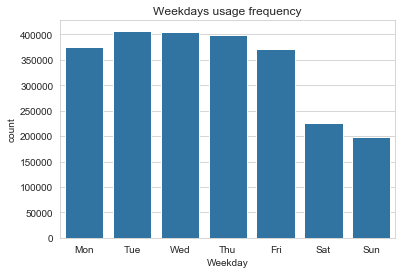

In [102]:
# set category order
level_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)

# assign the order
df_all["start_weekday"] = df_all["start_weekday"].astype(ordered_cat)

# plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_all, x = "start_weekday", color = base_color)
plt.title("Weekdays usage frequency")
plt.xlabel("Weekday");

> There are less users on weekends. Tuesday, Wednesday and Thursday are the most popular weekdays.

> Before I check at which time do people use the srvice, I need to convert a start hour column.

In [51]:
# function to round up
def round_up(col):
    ''' if minutes are more than 30, then round up'''
    if col > 30:
        return 1
    else:
        return 0

# round up start hour and delete columns which I will not use
df_all["start_hour"] = df_all["start_hour"] + df_all["start_min"].apply(round_up)
df_all.drop(columns = ["start_min", "end_hour", "end_min"], axis = 1, inplace = True)

In [52]:
# change 25 to 0 am
df_all.loc[df_all.start_hour == 25, "start_hour"] = 0

In [53]:
# test
df_all.columns

Index(['start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_gender', 'bike_share_for_all_trip', 'start_date', 'start_hour',
       'end_date', 'start_weekday', 'duration_min', 'age'],
      dtype='object')

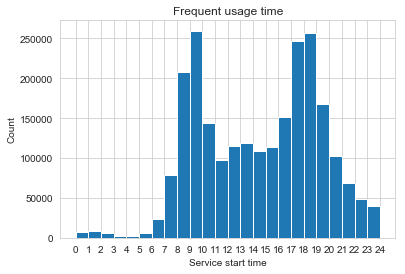

In [54]:
# plot distribution
bin_edges = np.arange(0, 24 +1, 1)
plt.hist(data = df_all, x = "start_hour", bins = bin_edges)
plt.xticks(np.arange(0, 24 +1))
plt.title("Frequent usage time")
plt.xlabel("Service start time")
plt.ylabel("Count");

>There are 2 peaks which are between 8 to 11 and between 17 to 20. People may be using the service to commute to work and University?? I will check if people drive to somewhere in the morning and then use the service again to return to the first place.

In [55]:
# refference create a df
# https://nbviewer.jupyter.org/github/vincentropy/python_cartography_tutorial/blob/master/part1_basic_folium_maps.ipynb
# https://www.youtube.com/watch?v=4RnU5qKTfYY

def get_hourly_usage_counts(selected_start_hour):
    '''Count start count and return count of bikes at each station at selected time and return df'''
    # get unique start_station id and create a data frame with the combination of id, latidtude, longitude, name
    locations = df_all.groupby("start_station_id").first()
    locations = locations.loc[:, ["start_station_latitude","start_station_longitude","start_station_name"]]

    # select interesting time to check
    df_all_sub = df_all[df_all["start_hour"] == selected_start_hour]

    # usage count of each station
    start_counts =  pd.DataFrame(df_all_sub.groupby("start_station_id").size())
    start_counts.columns = ["start_count"]
    
    # arrival count of each station
    end_counts =  pd.DataFrame(df_all_sub.groupby("end_station_id").size())
    end_counts.columns = ["end_count"]
  
    # merge df start counts, end counts, and locations
    trip_counts = start_counts.join(locations).join(end_counts)
        
    return trip_counts

In [56]:
# test to check df
get_hourly_usage_counts(1).head()

,start_count,start_station_latitude,start_station_longitude,start_station_name,end_count
start_station_id,,,,,
10.0,40,37.795393,-122.404770,Washington St at Kearny St,41.0
100.0,37,37.767100,-122.410662,Bryant St at 15th St,3.0
101.0,13,37.766008,-122.405677,San Bruno Ave at 16th St,11.0
102.0,4,37.766883,-122.399579,Irwin St at 8th St,6.0
104.0,2,37.767045,-122.390833,4th St at 16th St,9.0


In [57]:
# refference plot on a map
# https://nbviewer.jupyter.org/github/vincentropy/python_cartography_tutorial/blob/master/part1_basic_folium_maps.ipynb
# https://www.youtube.com/watch?v=4RnU5qKTfYY

# plot in a map
def plot_map(trip_counts):  
    '''This function will return a map of San Francisco with plots of bike share information'''
    # create a map in San Francisco with 50% size so that 2 maps can be compared at the same time
    folium_map = folium.Map(location = [37.795393, -122.404770],
                            zoom_start = 13,
                            tiles = "cartodbpositron", 
                            width = "70%")

    # for each row in the data, add a cicle marker
    for index, row in trip_counts.iterrows():

        # calc if the station is used more as a start location or not   
        net_departures = (row["start_count"] - row["end_count"])

        popup = "<strong>{}</strong><br> total start_usage: {}<br> total return: {}<br> net departures: {}"
        popup = popup.format(row["start_station_name"],
                                       row["start_count"],
                                       row["end_count"],
                                         net_departures)
        # radius of plotted circles
        radius = net_departures / 150

        '''if there are more lended bycicles at a station, highlight to blue, if the same number of bycicle lended are
            returnd, highlight to green, otherwise orange
        '''
        
        if net_departures > 0:
            color = "#0375B4" # Blue
        elif net_departures == 0:
            color = "#00FF00" # Green
        else:
            color = "#FF8000" # Orange
        # add circle marker on the San Francisco map
        folium.CircleMarker(location = (row["start_station_latitude"], row["start_station_longitude"]), 
                            radius = radius,
                            color = color, 
                            popup = popup,
                            fill = True).add_to(folium_map)


    return folium_map

In [58]:
# check the most frequen usage hour
df_all.start_hour.value_counts(ascending = False).head()

9     259716
18    256365
17    246497
8     207594
19    168301
Name: start_hour, dtype: int64

> I will compare the two most frequent usage hour of 9am and 18pm. 

In [59]:
# plot bike share status at 9am
trip_counts = get_hourly_usage_counts(9)
plot_map(trip_counts)

In [60]:
# plot bike share status at 6pm
trip_counts = get_hourly_usage_counts(18)
folium_map = plot_map(trip_counts)
folium_map

> I can see around the bottom left corner that there are more people who borow a bycicle at 9am, but at 18pm there are more people who return it.

Is there any differences in weekdays?

In [61]:
# refference
# https://nbviewer.jupyter.org/github/vincentropy/python_cartography_tutorial/blob/master/part1_basic_folium_maps.ipynb
# https://www.youtube.com/watch?v=4RnU5qKTfYY

def get_usage_counts_weekday(selected_start_weekday):
    # get unique start_station id and create a data frame with the combination of id, latidtude, longitude, name
    locations = df_all.groupby("start_station_id").first()
    locations = locations.loc[:, ["start_station_latitude","start_station_longitude","start_station_name"]]

    # select interesting time to check
    df_all_sub = df_all[df_all["start_weekday"] == selected_start_weekday]

    # usage count of each station
    start_counts =  pd.DataFrame(df_all_sub.groupby("start_station_id").size())
    start_counts.columns = ["start_count"]
    
    # arrival count of each station
    end_counts =  pd.DataFrame(df_all_sub.groupby("end_station_id").size())
    end_counts.columns = ["end_count"]
  
    # merge df start counts, end counts, and locations
    trip_counts = start_counts.join(locations).join(end_counts)
        
    return trip_counts

In [62]:
# plot bike share status on Saturday
trip_counts = get_usage_counts_weekday("Sat")
sat = plot_map(trip_counts)
sat

In [63]:
# plot bike share status on Monday
trip_counts = get_usage_counts_weekday("Tue")
tue = plot_map(trip_counts)
tue

> On weekday like Tuesday has more blue bubles which shows that more bikes are returned to other places or not yet returned to the same place. However, there are not much differences.

In [64]:
# average usage duration
df_all.groupby("user_type").mean().duration_min

user_type
Customer      35.037661
Subscriber    11.271565
Name: duration_min, dtype: float64

<table style="width30%">
    <tr>
        <th>Customer type</th>
        <th>duration in minute</th>
    </tr>
    <tr>
        <td>Spontaneous user</td>
        <td>35.037661</td>
    </tr>
    <tr>
        <td>Member user</td>
        <td>11.271565</td>
    </tr>
</table>

In [65]:
# user type counts
df_all.groupby("user_type").size()

user_type
Customer       390637
Subscriber    1992784
dtype: int64

> A customer type (causal usage) has more longer usage time in average. 

In [66]:
# usage duration difference in service users of "bike_share_for_all_trip"
df_all.groupby("bike_share_for_all_trip").mean().duration_min

bike_share_for_all_trip
No     15.351004
Yes    12.646077
Name: duration_min, dtype: float64

> Even though the bike_share_for_all_trip entitled user can use the service longer per trip, non- entitled user rides more in average.

> Are there any changes in frequency of usage overtime?

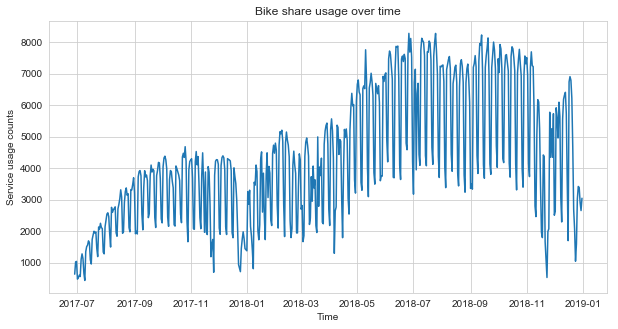

In [67]:
# plot frequency of bike share over time
# get average
date = df_all.groupby("start_date").size()

# set longer x axis
plt.figure(figsize=[10, 5])

# plot
sns.lineplot(data = date)

# set title and labels
plt.title("Bike share usage over time")
plt.xlabel("Time")
plt.ylabel("Service usage counts");


> Overall Ford Gobike's usage counts increase over time. However, there are less usage in Winter seasons like in December and January.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformation?

> Usage time need to be log transformed as the distribution is very skewed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I transformed the duration time in second to minute as second will not bring much advantage against minute. Moreover, it is more difficult to handle with. The member birth date is also transformed into age. However the age column need to be cleaned as there are error data showing more than 100 years old like around 130 years old. I visualized ages focusing on below 100 years old

## Bivariate Exploration
> Are there any different behaviors in gender?

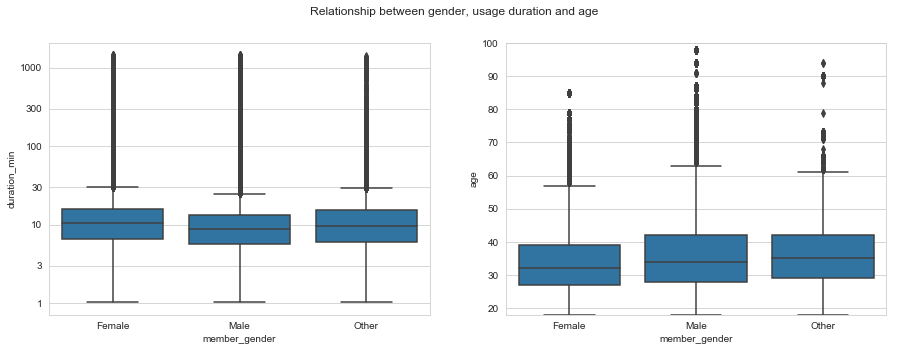

In [68]:
# plot relationship between gender vs duration and gender vs age
base_color = sns.color_palette()[0]

plt.figure(figsize=[15, 5])
plt.subplot(1, 2, 1)
plt.yscale("log")
tick_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.yticks(tick_locs, tick_locs)
sns.boxplot(data = df_all, x = "member_gender", y = "duration_min", color = base_color)

plt.subplot(1, 2, 2)
sns.boxplot(data = df_all, x = "member_gender", y = "age", color = base_color)
plt.ylim(18, 100)

plt.suptitle("Relationship between gender, usage duration and age");

> There are not much differences. Are there any gender differences in membership?

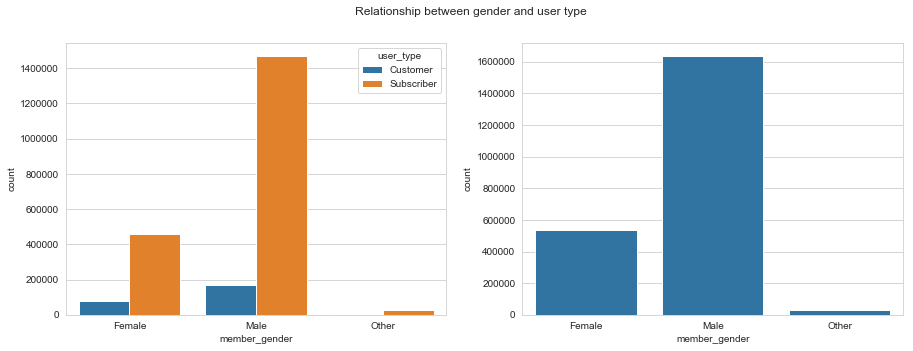

In [69]:
# relationship between gender and user type
plt.figure(figsize=[15, 5])
# left plot
plt.subplot(1, 2, 1)
sns.countplot(data = df_all, x = "member_gender", hue = "user_type" )
plt.title("")
# right plot
plt.subplot(1, 2, 2)
sns.countplot(data = df_all, x = "member_gender", color = base_color)

plt.suptitle("Relationship between gender and user type");

> There are also not much differences. I will now check if there are any behavioral differences in user type (member user or not)

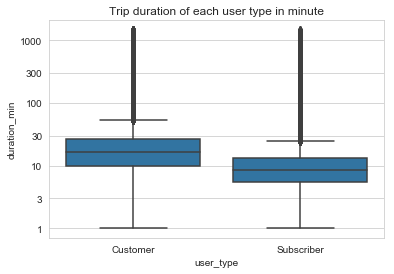

In [96]:
# box plot user type and trip duration
plt.yscale("log")
tick_locs = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
plt.yticks(tick_locs, tick_locs)
sns.boxplot(data = df_all, x = "user_type", y = "duration_min", color = base_color)
plt.title("Trip duration of each user type in minute");

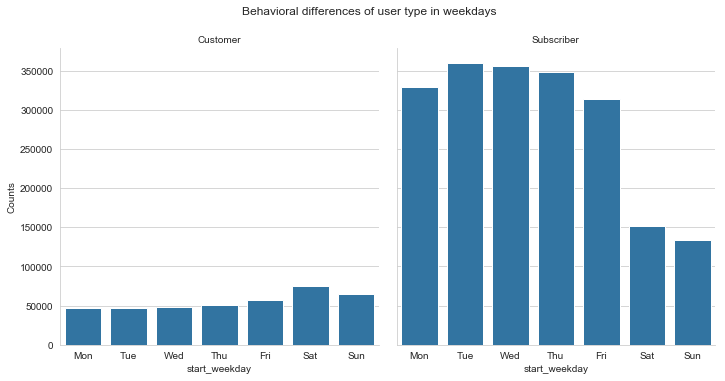

In [71]:
# set category order
level_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

g = sns.FacetGrid(data = df_all, col = "user_type", height = 5)
g.map(sns.countplot, "start_weekday", order = level_order)
g.set_titles('{col_name}')
g.set_ylabels("Counts")
plt.suptitle("Behavioral differences of user type in weekdays",x = 0.5, y = 1.05, va = "top");

> Users without any membership use longer per trip and more on weekends. 

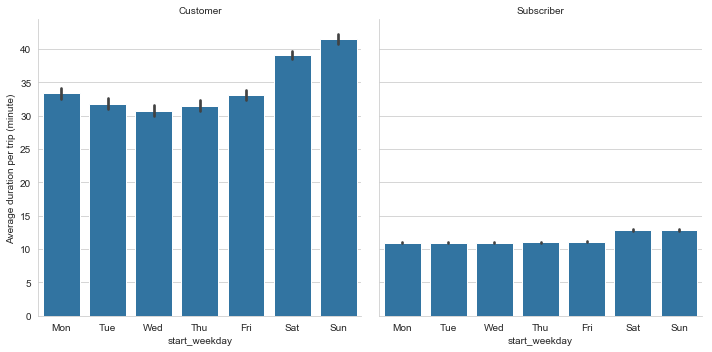

In [123]:
# plot trip time duration of each user type
g = sns.FacetGrid(data = df_all, col = "user_type", height = 5)
g.map(sns.barplot, "start_weekday", "duration_min", order = level_order)
g.set_titles('{col_name}')
g.set_ylabels("Average duration per trip (minute)");

> Member user rides a shared bike for a short time. This makes sense as non members can use max 30 minutes per trip for 2 dollars and extra 15 minutes for additional 3 dollars. Or 10 dollars for 30 minutes unlimited ride.
<ul>
    <li>2 dollars per trip / max 30 min</li>
    <li>10 dollars a day / unlimited 30 min ride</li>
    <li>Member (subscriber):15 dollars a month / unlimited 45min trips</li>
    <li>Bike Share For All 5 dollars for the first year / 60 min trip</li>
    https://www.fordgobike.com/pricing
</ul>

> Are there any differences in what time they start using a shared bike?

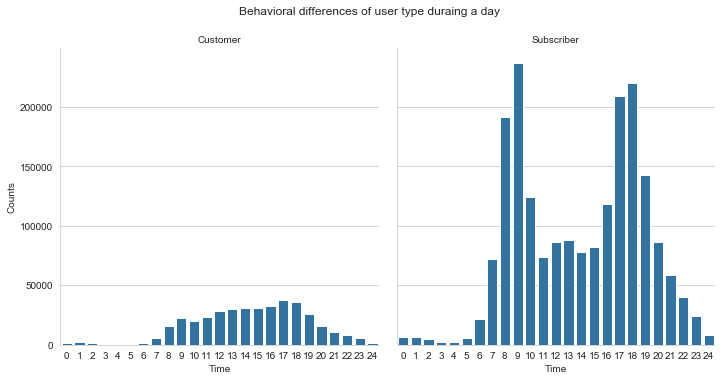

In [138]:
# set category order
level_order = np.arange(0, 25, 1)
g = sns.FacetGrid(data = df_all, col = "user_type", height = 5)
g.map(sns.countplot, "start_hour", order = level_order)
g.set_titles('{col_name}')
g.set_ylabels("Counts")
g.set_xlabels("Time")
plt.suptitle("Behavioral differences of user type duraing a day",x = 0.5, y = 1.05, va = "top");

> Whilst there is no trend in the start time for spontaneous users, there is an obvious trend for member users (subscriber).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> A user type has strong infulence on the user behaviors like when they borrow a shared bike and how long they use it.


## Multivariate Exploration

In [74]:
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column
df_all["start_ym"] = df_all.start_date.map(lambda x: x.strftime('%y-%m'))

In [75]:
df_sub1 = df_all.groupby(["user_type", "start_ym"]).count()["duration_min"]
df_sub1 = df_sub1.reset_index(name = "usage_count")

df_sub2 = df_all.groupby(["user_type", "start_ym"]).mean()["duration_min"]
df_sub2 = df_sub2.reset_index(name = "avg_duration")

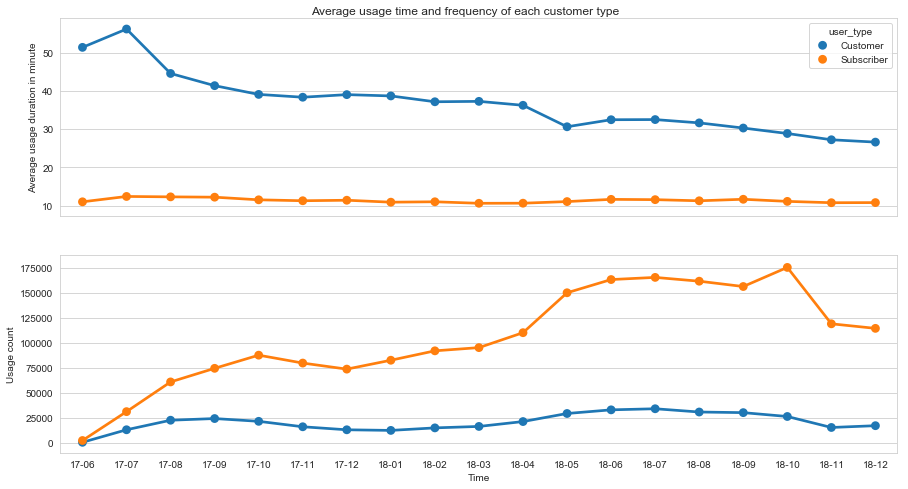

In [137]:
# plot

plt.figure(figsize=[15, 8])
plt.subplot(2, 1, 1)
ax1 = sns.pointplot(data = df_sub2, x = 'start_ym', y = 'avg_duration', hue = 'user_type', linestyles = "-")
plt.xlabel("")
plt.ylabel("Average usage duration in minute")
plt.tick_params(        #https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)


plt.subplot(2, 1, 2)
ax2 = sns.pointplot(data = df_sub1, x = 'start_ym', y = 'usage_count', hue = 'user_type', linestyles = "-")
plt.xlabel("Time")
plt.ylabel("Usage count")
ax2.get_legend().set_visible(False)

plt.suptitle("Average usage time and frequency of each customer type", y = 0.90);

> While service usage of member user tend to increase overtime, average usage time of spontaneous user decreases overtime.
Moreover, there seems to be a tendency that people use this service less in winter. It would be interesting to see any correlation between weather or temperature and usage duration per trip and usage counts.  